In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as mno

In [2]:
data = pd.read_csv('D:/Simplilearn Course\Datasets\Player Performance  Reviewer - Full Material/data-1.csv')
%time data = pd.read_csv('D:/Simplilearn Course\Datasets\Player Performance  Reviewer - Full Material/data-1.csv')

Wall time: 134 ms


In [3]:
data

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [4]:
pd.set_option('max_columns', 100)
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [6]:
data.iloc[:,2:].describe()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [7]:
data.iloc[:,13:].describe(include = 'object')

,Preferred Foot,Work Rate,Body Type,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Release Clause
count,18159,18159,18159,18159,18147,16654,1264,17918,18159,18159,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16643
unique,2,9,10,2,27,1736,341,36,21,57,93,93,93,105,102,102,102,105,101,101,101,100,92,92,92,100,95,99,99,99,95,98,108,108,108,98,1244
top,Right,Medium/ Medium,Normal,No,ST,"Jul 1, 2018",Atalanta,2019,6'0,165lbs,61+2,61+2,61+2,63+2,61+2,61+2,61+2,63+2,61+2,61+2,61+2,61+2,58+2,58+2,58+2,61+2,61+2,62+2,62+2,62+2,61+2,61+2,63+2,63+2,63+2,61+2,€1.1M
freq,13948,9810,10595,16505,2152,1538,20,4819,2881,1483,705,705,705,745,713,713,713,745,744,744,744,804,762,762,762,804,713,660,660,660,713,669,634,634,634,669,557


In [8]:
data.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

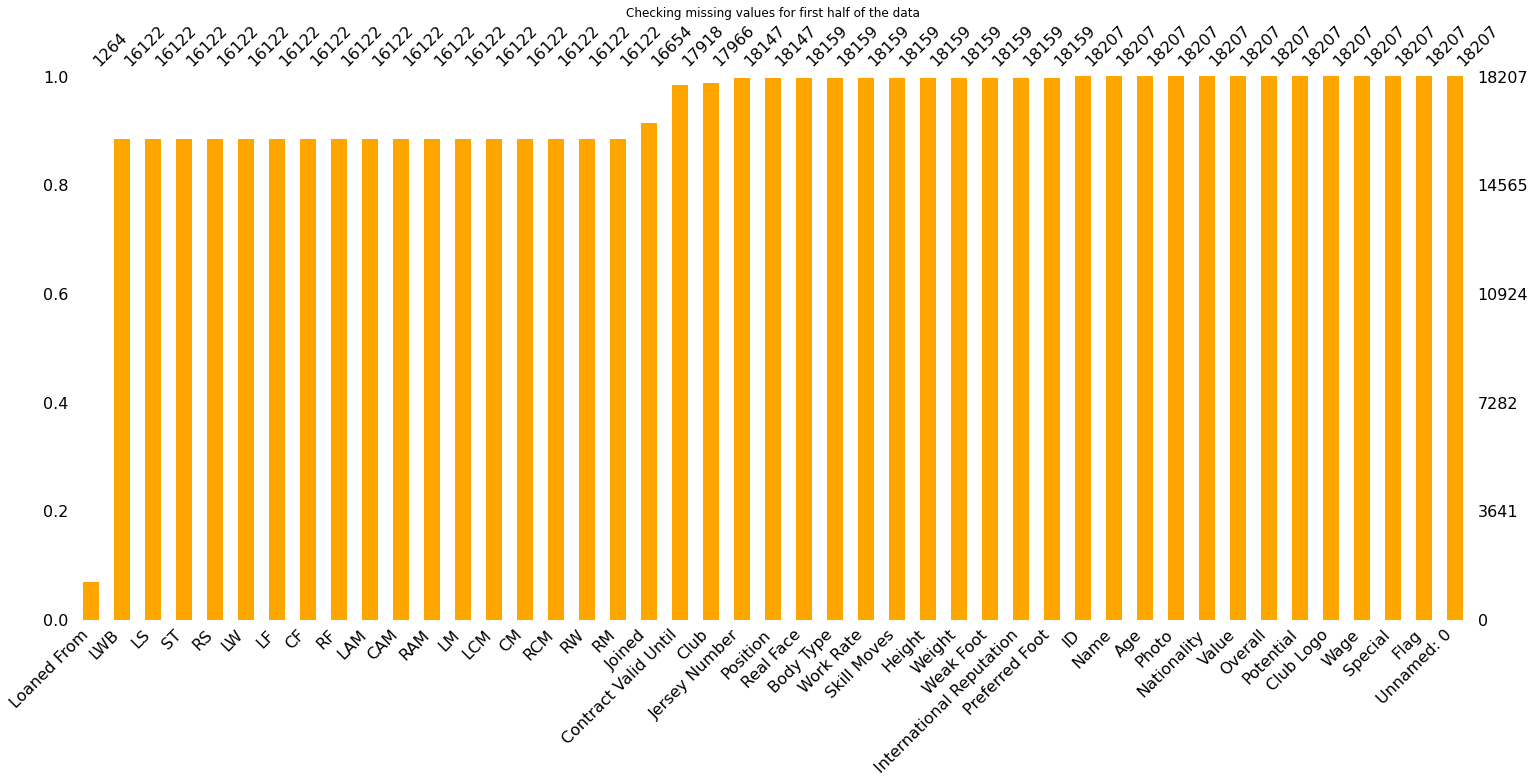

In [9]:
mno.bar(data.iloc[:,:45], color= 'orange' , sort ='ascending')
plt.title('Checking missing values for first half of the data')
plt.show()

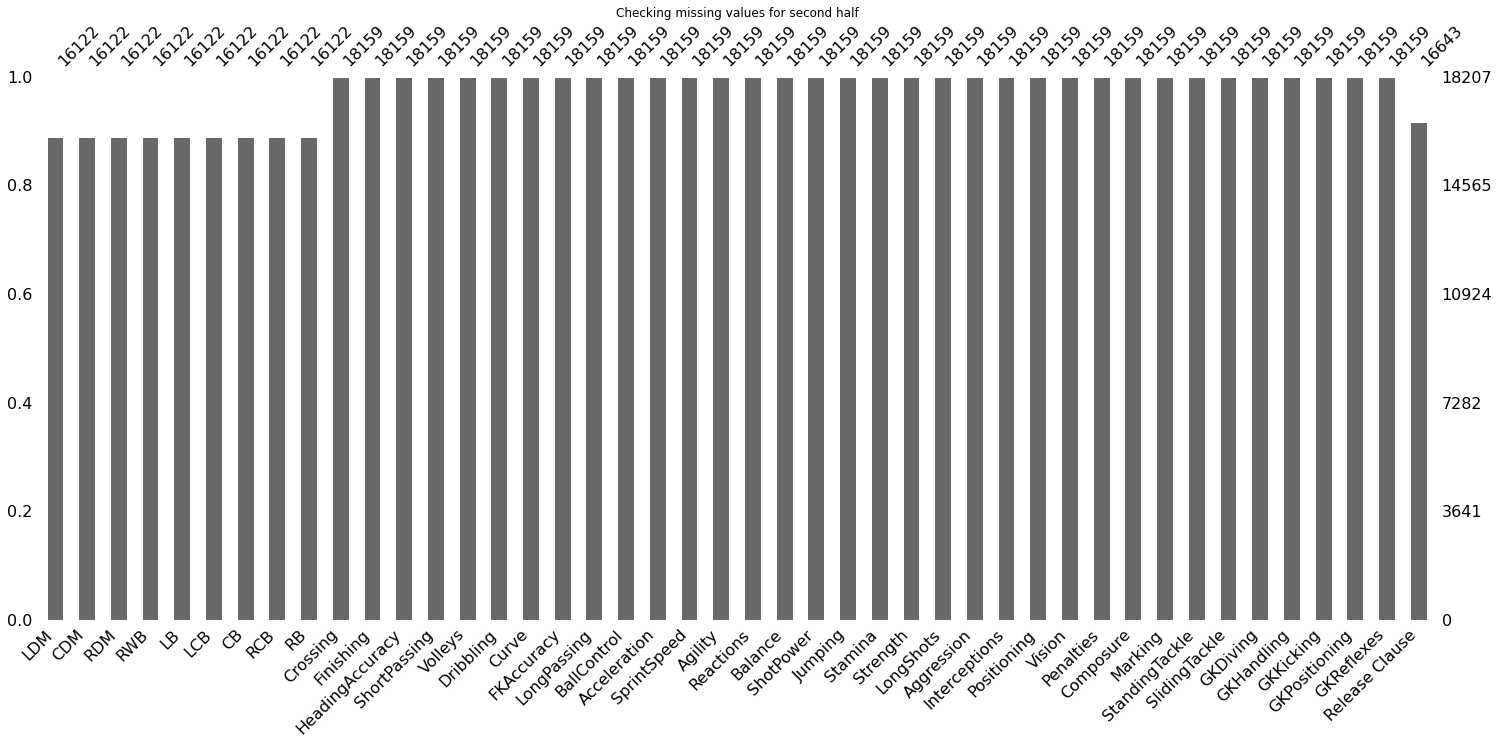

In [10]:
mno.bar(data.iloc[:,45:])
plt.title('Checking missing values for second half')
plt.show()

<AxesSubplot:>

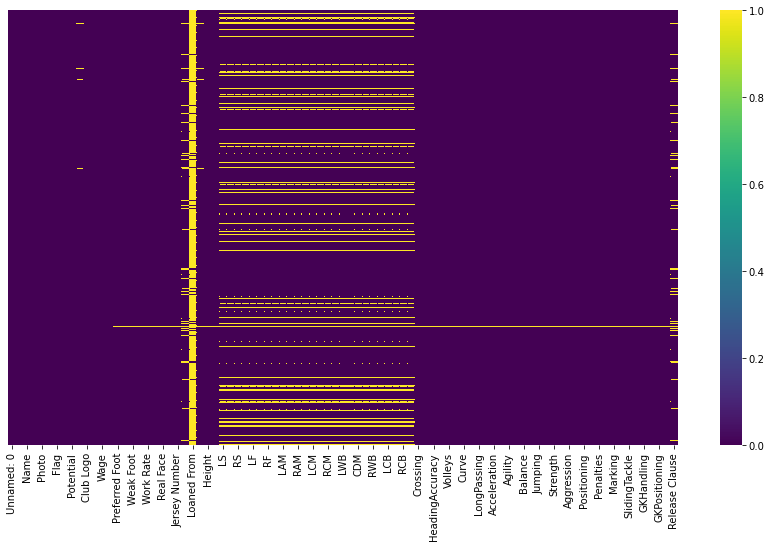

In [11]:
plt.figure(figsize = (15,8))
sns.heatmap(data.isnull(), yticklabels = False, cmap='viridis', annot_kws={'size': 30})


In [12]:
data['ShortPassing']

0        90.0
1        81.0
2        84.0
3        50.0
4        92.0
         ... 
18202    49.0
18203    43.0
18204    38.0
18205    42.0
18206    48.0
Name: ShortPassing, Length: 18207, dtype: float64

In [13]:
pd.set_option('max_columns', 100)
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [14]:
# Filling the missing values now

data['ShortPassing'].fillna(data['ShortPassing'].mean(),inplace = True)
data['Volleys'].fillna(data['Volleys'].mean(), inplace = True)
data['Dribbling'].fillna(data['Dribbling'].mean(), inplace = True)
data['Curve'].fillna(data['Curve'].mean(), inplace = True)
data['FKAccuracy'].fillna(data['FKAccuracy'], inplace = True)
data['LongPassing'].fillna(data['LongPassing'].mean(),inplace = True)
data['BallControl'].fillna(data['BallControl'].mean(),inplace = True)
data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(),inplace = True)
data['Finishing'].fillna(data['Finishing'].mean(),inplace = True)
data['Crossing'].fillna(data['Crossing'].mean(),inplace = True)
data['Weight'].fillna('200lbs',inplace = True)
data['Contract Valid Until'].fillna(2019,inplace = True)
data['Height'].fillna("5'11",inplace = True)
data['Loaned From'].fillna('None',inplace = True)
data['Joined'].fillna('Jul 1, 2018',inplace = True)
data['Jersey Number'].fillna(8,inplace = True)
data['Body Type'].fillna('Normal',inplace = True)
data['Position'].fillna('ST',inplace = True)
data['Club'].fillna('No Club',inplace = True)
data['Work Rate'].fillna('Medium/Medium',inplace = True)
data['Skill Moves'].fillna(data['Skill Moves'].median(),inplace = True)
data['Weak Foot'].fillna(3,inplace = True)
data['Preferred Foot'].fillna('Right',inplace = True)
data['International Reputation'].fillna(1,inplace = True)
data['Wage'].fillna('€200K',inplace = True)
data.fillna(0, inplace = True)

In [15]:
data.isnull().sum().sum()

0

In [16]:
# Feature Engineering
# Creating new features by aggregating the features

def defending(data):
    return int(round((data[['Marking', 'StandingTackle', 'SlidingTackle']].mean()).mean()))

def general(data):
    return int(round((data[['HeadingAccuracy', 'Dribbling', 'Curve','BallControl']].mean()).mean()))

def mental(data):
    return int(round((data[['Aggression', 'Interceptions', 'Positioning', 'Vision', 'Composure']].mean()).mean()))

def passing(data):
    return int(round((data[['Crossing', 'ShortPassing', 'LongPassing']].mean()).mean()))

def mobility(data):
    return int(round((data[['Acceleration', 'SprintSpeed', 'Agility', 'Reactions']].mean()).mean()))

def power(data):
    return int(round((data[['Balance', 'Jumping', 'Stamina', 'Strength']].mean()).mean()))

def rating(data):
    return int(round((data[['Potential', 'Overall', 'SlidingTackle']].mean()).mean()))

def shooting(data):
    return int(round((data[['Finishing', 'Volleys', 'FKAccuracy', 'ShotPower', 'LongShots', 'Penalties']].mean()).mean()))


In [17]:
data['Defending'] = data.apply(defending, axis = 1)
data['General'] = data.apply(general, axis = 1)
data['Mental'] = data.apply(mental, axis = 1)
data['Passing'] = data.apply(passing, axis = 1)
data['Mobility'] = data.apply(mobility, axis = 1)
data['Power'] = data.apply(power, axis = 1)
data['Rating'] = data.apply(rating, axis = 1)
data['Shooting'] = data.apply(shooting, axis = 1)

In [18]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

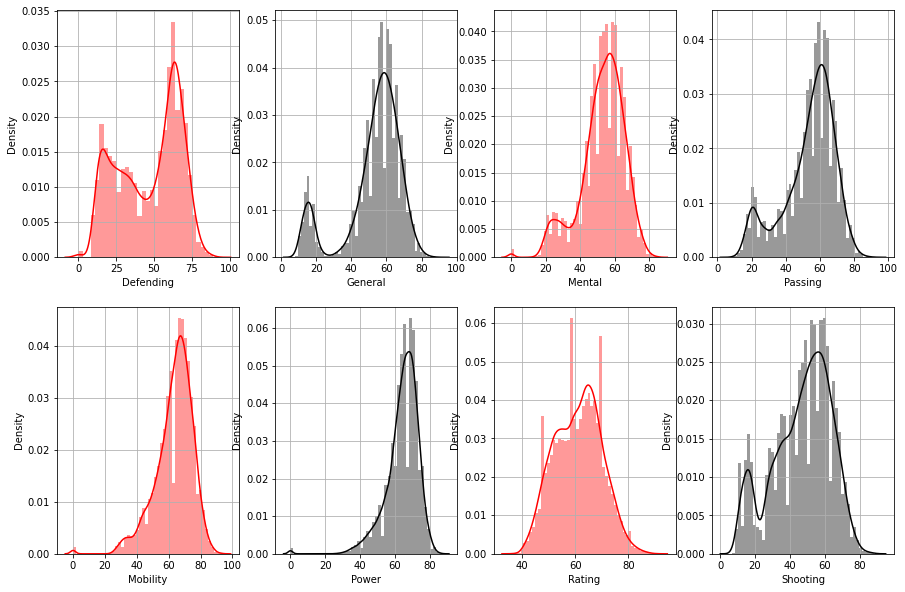

In [19]:
plt.figure(figsize = (15,10))
plt.subplot(2,4,1)
sns.distplot(data['Defending'], color = 'red')
plt.grid()

plt.subplot(2,4,2)
sns.distplot(data['General'], color = 'black')
plt.grid()

plt.subplot(2,4,3)
sns.distplot(data['Mental'], color = 'red')
plt.grid()

plt.subplot(2,4,4)
sns.distplot(data['Passing'], color = 'black')
plt.grid()

plt.subplot(2,4,5)
sns.distplot(data['Mobility'], color = 'red')
plt.grid()

plt.subplot(2,4,6)
sns.distplot(data['Power'], color = 'black')
plt.grid()

plt.subplot(2,4,7)
sns.distplot(data['Rating'], color = 'red')
plt.grid()

plt.subplot(2,4,8)
sns.distplot(data['Shooting'], color = 'black')
plt.grid()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


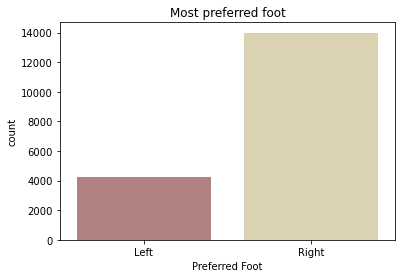

In [20]:
sns.countplot(data['Preferred Foot'], palette='pink')
plt.title('Most preferred foot')
plt.show()

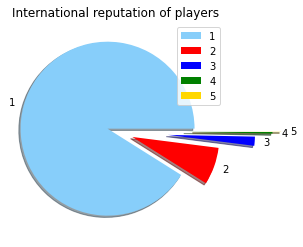

In [21]:
labels = ['1','2','3','4','5']
sizes = data['International Reputation'].value_counts()
colors = ['lightskyblue', 'red', 'blue', 'green', 'gold']
explode = [0.1, 0.2, 0.6, 0.8, 0.9]

plt.pie(sizes, labels=labels, colors=colors, explode=explode, shadow=True)
plt.title('International reputation of players')
plt.legend()
plt.show()

In [22]:
data[data['International Reputation'] == 5][['Name', 'Nationality','Overall']].sort_values(by ='Overall', ascending = False).style.background_gradient(cmap='magma')  

,Name,Nationality,Overall
0,L. Messi,Argentina,94
1,Cristiano Ronaldo,Portugal,94
2,Neymar Jr,Brazil,92
7,L. Suárez,Uruguay,91
22,M. Neuer,Germany,89
109,Z. Ibrahimović,Sweden,85


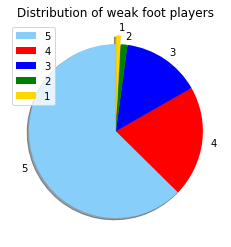

In [23]:
labels = ['5','4','3','2','1']
sizes = data['Weak Foot'].value_counts()
colors = ['lightskyblue', 'red', 'blue', 'green', 'gold']
explode = [0, 0, 0, 0, 0.1]

plt.pie(sizes, labels=labels, colors=colors, explode=explode, shadow=True,startangle = 90)
plt.title('Distribution of weak foot players')
plt.legend()
plt.show()

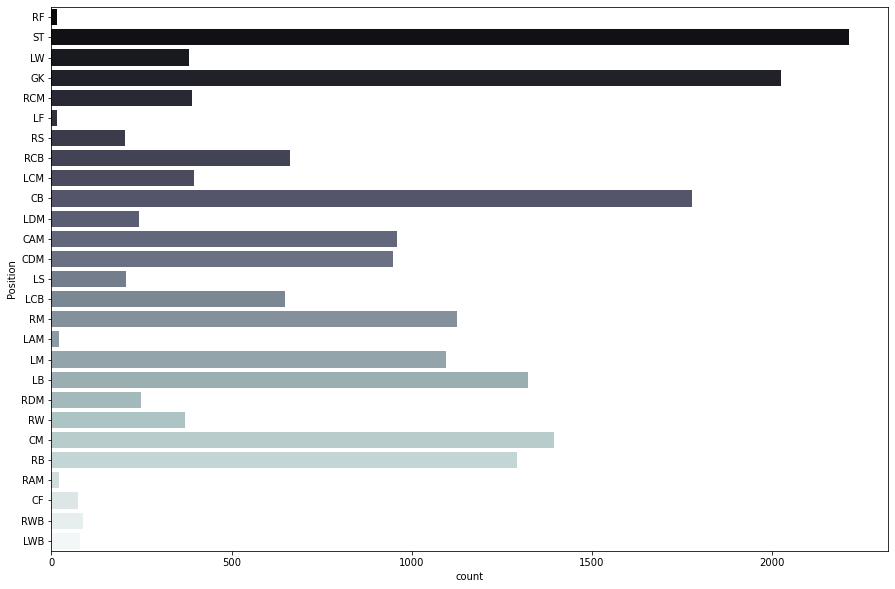

In [24]:
plt.figure(figsize = (15,10))
sns.countplot(y = 'Position', data=data, palette='bone')

plt.show()

In [25]:
def extract_value_from(value):
    out = value.replace('lbs','')
    return float(out)

data['Weight'] = data['Weight'].apply(lambda x: extract_value_from(x))


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


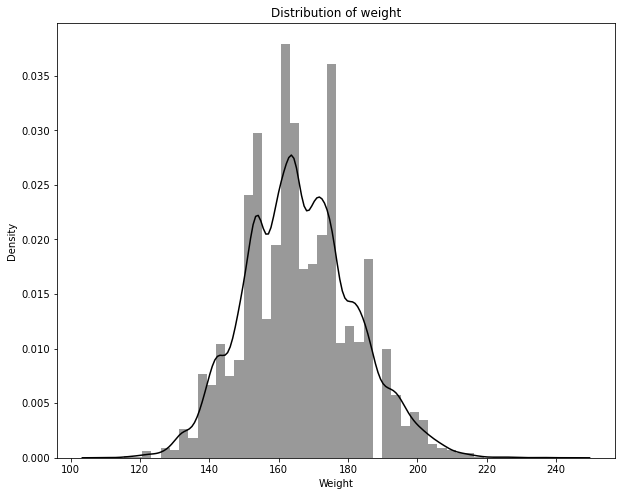

In [26]:
plt.figure(figsize = (10,8))
sns.distplot(data['Weight'], color='black')
plt.title('Distribution of weight')
plt.show()

In [27]:
# Cleaning the wage column

def extract_value_from(column):
    out = column.replace('€','')
    if 'M' in out:
        out = float(out.replace('M',''))*1000000
    elif 'K' in out:
        out = float(out.replace('K',''))*1000
    return float(out)

In [28]:
data['Value'] = data['Value'].apply(lambda x: extract_value_from(x))
data['Wage'] = data['Wage'].apply(lambda x: extract_value_from(x))

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


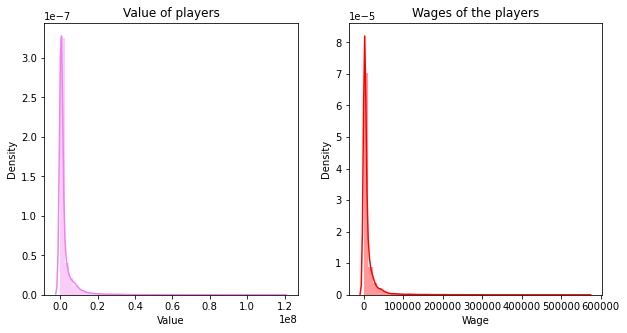

In [29]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(data['Value'], color='violet')
plt.title('Value of players')

plt.subplot(1,2,2)
sns.distplot(data['Wage'], color = 'red')
plt.title('Wages of the players')
plt.show()

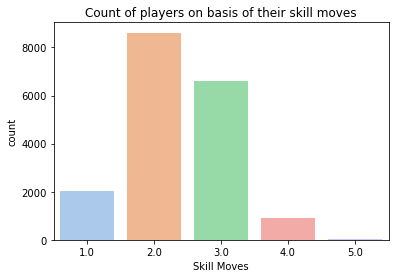

In [30]:
sns.countplot(x='Skill Moves', data=data, palette='pastel')
plt.title('Count of players on basis of their skill moves')
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Medium/ Medium'),
  Text(1, 0, 'High/ Low'),
  Text(2, 0, 'High/ Medium'),
  Text(3, 0, 'High/ High'),
  Text(4, 0, 'Medium/ High'),
  Text(5, 0, 'Medium/ Low'),
  Text(6, 0, 'Low/ High'),
  Text(7, 0, 'Low/ Medium'),
  Text(8, 0, 'Low/ Low'),
  Text(9, 0, 'Medium/Medium')])

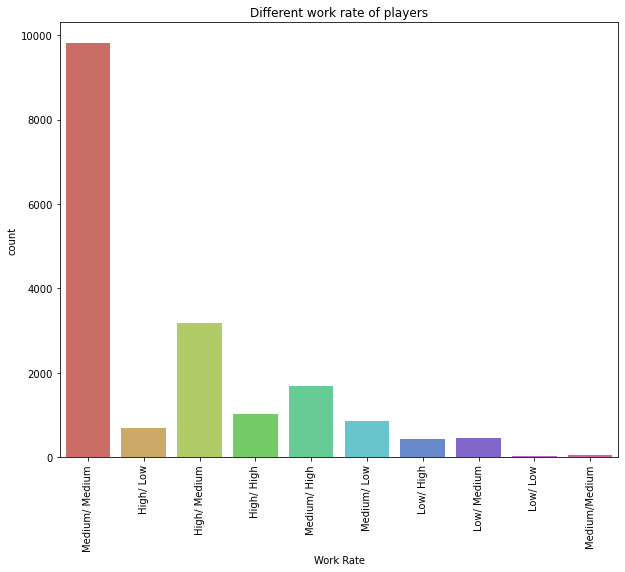

In [31]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'Work Rate', data=data, palette='hls')
plt.title('Different work rate of players')
plt.xticks(rotation=90)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Overall')

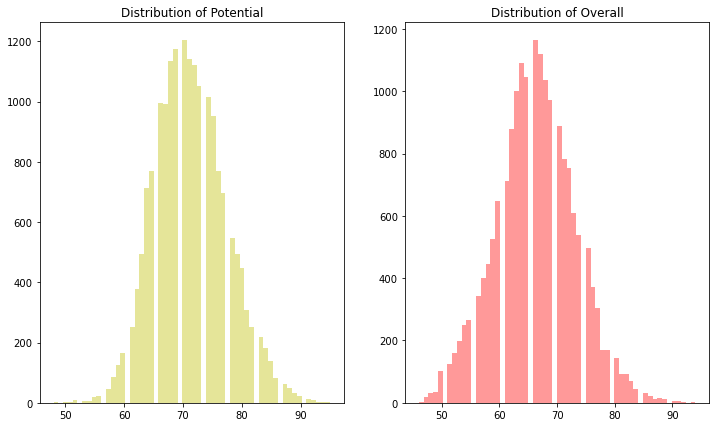

In [32]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
sns.distplot(x=data['Potential'],bins=58, kde=False, color='y')
plt.title('Distribution of Potential')

plt.subplot(1,2,2)
sns.distplot(x=data['Overall'], bins =58, kde =False, color='r')
plt.title('Distribution of Overall')

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Comparison of overall scored and age w.r.t preferred foot')

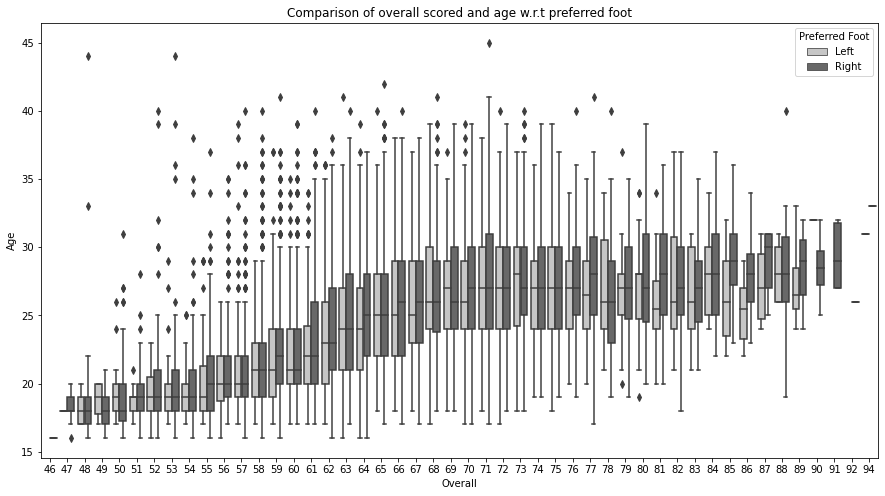

In [33]:
plt.figure(figsize=(15,8))
sns.boxplot(data['Overall'], data['Age'], hue= data['Preferred Foot'], palette='Greys')
plt.title('Comparison of overall scored and age w.r.t preferred foot')

Text(0.5, 1.0, 'Countries having highest no. of players')

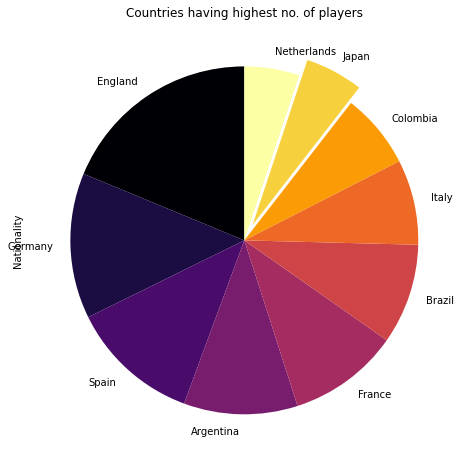

In [34]:
plt.figure(figsize=(10,8))
data['Nationality'].value_counts().head(10).plot(kind='pie', cmap='inferno', 
                                                startangle=90, explode=[0,0,0,0,0,0,0,0,0.1,0])
plt.title('Countries having highest no. of players')


<AxesSubplot:xlabel='Nationality', ylabel='Overall'>

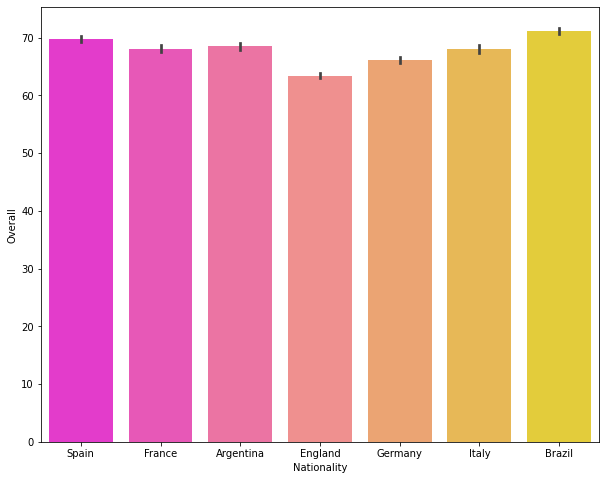

In [41]:
some_countries = ['England', 'Germany', 'Spain','Argentina', 'France', 'Brazil','Italy', 'Columbia']
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Overall']]
plt.figure(figsize=(10,8))
sns.barplot(x= data_countries['Nationality'], y= data_countries['Overall'], palette ='spring')

<AxesSubplot:xlabel='Nationality', ylabel='Weight'>

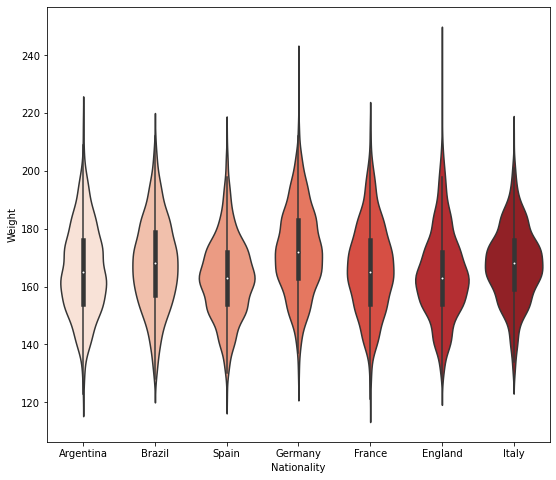

In [43]:
some_countries = ['England', 'Germany', 'Spain','Argentina', 'France', 'Brazil','Italy', 'Columbia']
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Weight']]
plt.figure(figsize=(9,8))
sns.violinplot(x = data_countries['Nationality'], y = data_countries['Weight'], palette='Reds')


<AxesSubplot:xlabel='Nationality', ylabel='Wage'>

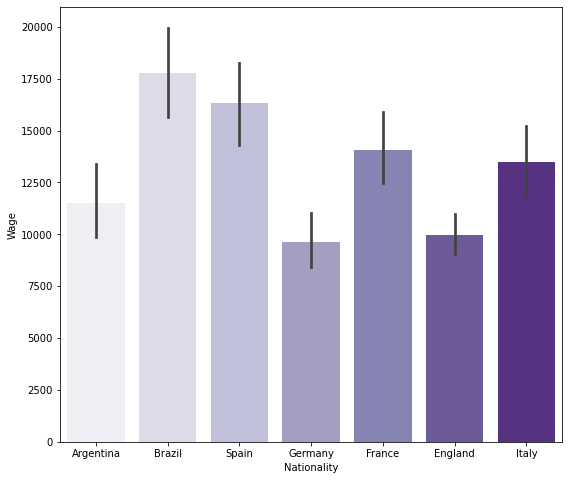

In [45]:
some_countries = ['England', 'Germany', 'Spain','Argentina', 'France', 'Brazil','Italy', 'Columbia']
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Wage']]
plt.figure(figsize=(9,8))
sns.barplot(x= data_countries['Nationality'], y= data_countries['Wage'], palette ='Purples')

<AxesSubplot:xlabel='Nationality', ylabel='International Reputation'>

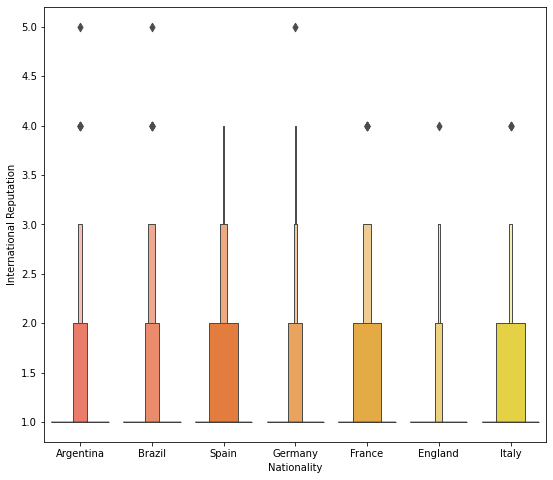

In [46]:
some_countries = ['England', 'Germany', 'Spain','Argentina', 'France', 'Brazil','Italy', 'Columbia']
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['International Reputation']]
plt.figure(figsize=(9,8))
sns.boxenplot(x= data_countries['Nationality'], y= data_countries['International Reputation'], palette ='autumn')

In [52]:
data['Club'].value_counts()

No Club                241
Real Madrid             33
Manchester City         33
Atlético Madrid         33
Empoli                  33
                      ... 
Atlético Mineiro        20
Ceará Sporting Club     20
Sligo Rovers            19
Limerick FC             19
Derry City              18
Name: Club, Length: 652, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Manchester City'),
  Text(1, 0, 'Chelsea'),
  Text(2, 0, 'Real Madrid'),
  Text(3, 0, 'FC Barcelona'),
  Text(4, 0, 'Tottenham Hotspur'),
  Text(5, 0, 'Valencia CF'),
  Text(6, 0, 'Southampton'),
  Text(7, 0, 'RC Celta'),
  Text(8, 0, 'CD Leganés'),
  Text(9, 0, 'Empoli'),
  Text(10, 0, 'Fortuna Düsseldorf')])

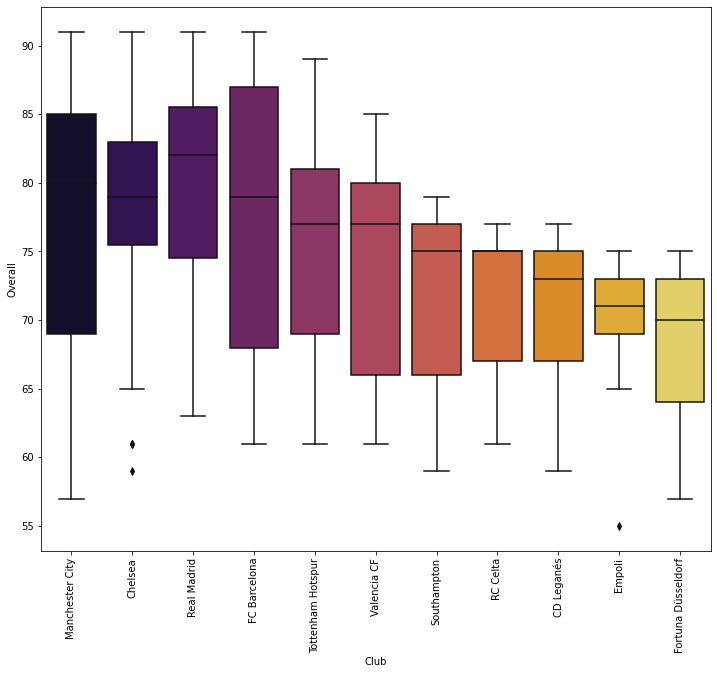

In [55]:
some_clubs = [ 'CD Leganés','Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchester City', 
             'Tottenham Hotspur','FC Barcelona', 'Valencia CF','Chelsea', 'Real Madrid']
data_clubs = data.loc[data['Club'].isin(some_clubs) & data['Overall']]
plt.figure(figsize=(12,10))
sns.boxplot(x= data_clubs['Club'], y= data_clubs['Overall'], palette ='inferno')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Manchester City'),
  Text(1, 0, 'Chelsea'),
  Text(2, 0, 'Real Madrid'),
  Text(3, 0, 'FC Barcelona'),
  Text(4, 0, 'Tottenham Hotspur'),
  Text(5, 0, 'Valencia CF'),
  Text(6, 0, 'Southampton'),
  Text(7, 0, 'RC Celta'),
  Text(8, 0, 'CD Leganés'),
  Text(9, 0, 'Empoli'),
  Text(10, 0, 'Fortuna Düsseldorf')])

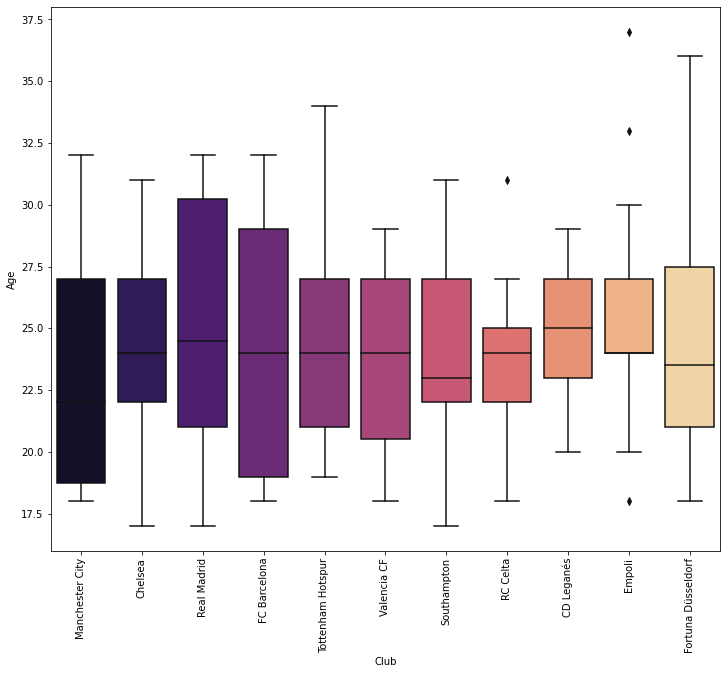

In [58]:
some_clubs = [ 'CD Leganés','Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchester City', 
             'Tottenham Hotspur','FC Barcelona', 'Valencia CF','Chelsea', 'Real Madrid']
data_clubs = data.loc[data['Club'].isin(some_clubs) & data['Overall']]
plt.figure(figsize=(12,10))
sns.boxplot(x= 'Club', y= 'Age',data = data_clubs, palette ='magma')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'FC Barcelona'),
  Text(1, 0, 'Manchester City'),
  Text(2, 0, 'Chelsea'),
  Text(3, 0, 'Real Madrid'),
  Text(4, 0, 'Tottenham Hotspur'),
  Text(5, 0, 'Valencia CF'),
  Text(6, 0, 'RC Celta'),
  Text(7, 0, 'Southampton'),
  Text(8, 0, 'CD Leganés'),
  Text(9, 0, 'Empoli'),
  Text(10, 0, 'Fortuna Düsseldorf')])

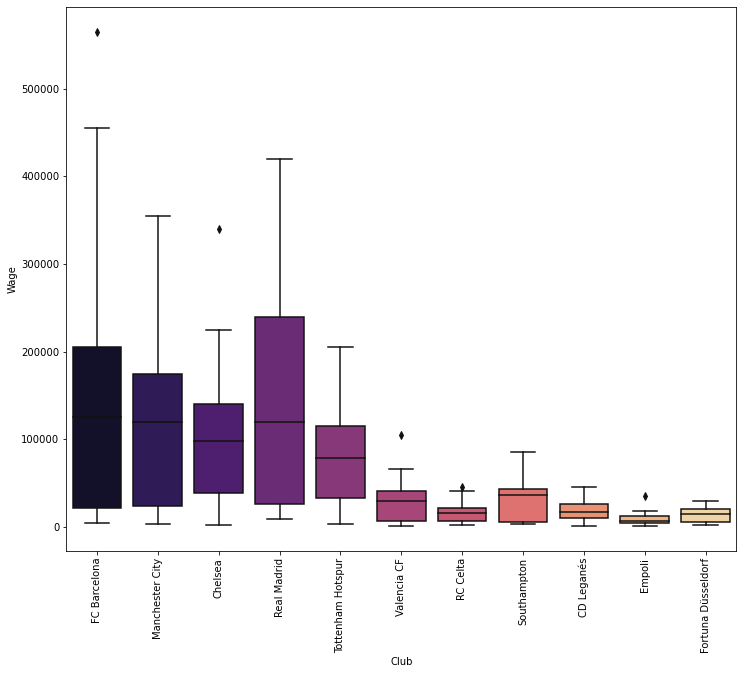

In [59]:
some_clubs = [ 'CD Leganés','Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchester City', 
             'Tottenham Hotspur','FC Barcelona', 'Valencia CF','Chelsea', 'Real Madrid']
data_clubs = data.loc[data['Club'].isin(some_clubs) & data['Wage']]
plt.figure(figsize=(12,10))
sns.boxplot(x= 'Club', y= 'Wage',data = data_clubs, palette ='magma')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'FC Barcelona'),
  Text(1, 0, 'Manchester City'),
  Text(2, 0, 'Chelsea'),
  Text(3, 0, 'Real Madrid'),
  Text(4, 0, 'Tottenham Hotspur'),
  Text(5, 0, 'Valencia CF'),
  Text(6, 0, 'RC Celta'),
  Text(7, 0, 'Southampton'),
  Text(8, 0, 'CD Leganés'),
  Text(9, 0, 'Empoli'),
  Text(10, 0, 'Fortuna Düsseldorf')])

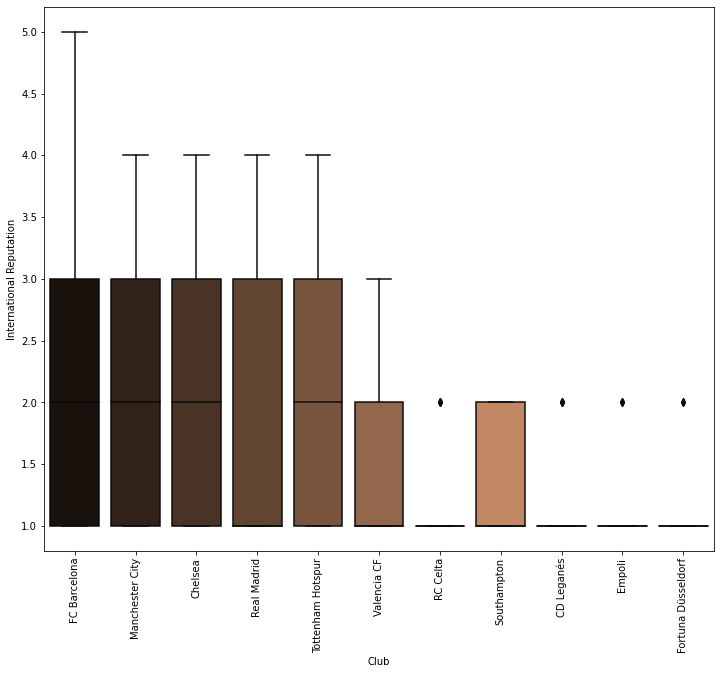

In [60]:
some_clubs = [ 'CD Leganés','Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchester City', 
             'Tottenham Hotspur','FC Barcelona', 'Valencia CF','Chelsea', 'Real Madrid']
data_clubs = data.loc[data['Club'].isin(some_clubs) & data['International Reputation']]
plt.figure(figsize=(12,10))
sns.boxplot(x= 'Club', y= 'International Reputation',data = data_clubs, palette ='copper')
plt.xticks(rotation=90)

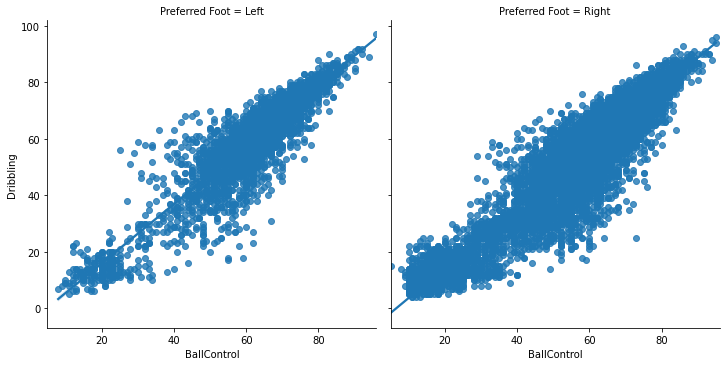

In [62]:
sns.lmplot(x = 'BallControl', y = 'Dribbling', data =data, col='Preferred Foot')


In [63]:
# Best players per each position with their age,club,nationality based on overall scores
data.iloc[data.groupby(data['Position'])['Overall'].idxmax()][['Position', 'Name', 'Age',
                                          'Club','Nationality', 'Overall']].sort_values(by='Overall',ascending=False)


,Position,Name,Age,Club,Nationality,Overall
1,ST,Cristiano Ronaldo,33,Juventus,Portugal,94
0,RF,L. Messi,31,FC Barcelona,Argentina,94
2,LW,Neymar Jr,26,Paris Saint-Germain,Brazil,92
5,LF,E. Hazard,27,Chelsea,Belgium,91
7,RS,L. Suárez,31,FC Barcelona,Uruguay,91
4,RCM,K. De Bruyne,27,Manchester City,Belgium,91
3,GK,De Gea,27,Manchester United,Spain,91
8,RCB,Sergio Ramos,32,Real Madrid,Spain,91
12,CB,D. Godín,32,Atlético Madrid,Uruguay,90
11,LCM,T. Kroos,28,Real Madrid,Germany,90


In [69]:
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual


In [70]:
#analysing skills

@interact
def skill(skills= ['Defending', 'General', 'Mental','Passing','Mobility','Power','Rating','Shooting'],score=75):
    return data[data[skills]> score][['Name','Nationality','Club','Overall',skills]].sort_values(by=skills,ascending=False)


interactive(children=(Dropdown(description='skills', options=('Defending', 'General', 'Mental', 'Passing', 'Mo…

In [74]:
# top 15 players from each country
@interact
def country(country= list(data['Nationality'].value_counts().index)):
    return data[data['Nationality']== country ][['Name','Position','Overall', 'Potential']].sort_values(by='Overall',
                                                                                                       ascending=False).head(15)

interactive(children=(Dropdown(description='country', options=('England', 'Germany', 'Spain', 'Argentina', 'Fr…

In [76]:
@interact
def club(club= list(data['Club'].value_counts().index[1:])):
    return data[data['Club']== club ][['Name', 'Jersey Number','Position','Overall', 'Nationality',
                                      'Age','Wage','Value','Contract Valid Until']].sort_values(by='Overall',
                                                                                                       ascending=False).head(15)

interactive(children=(Dropdown(description='club', options=('Real Madrid', 'Manchester City', 'Atlético Madrid…

In [77]:
# Youngest players
youngest = data[data['Age']==16][['Name', 'Age','Club','Nationality','Overall']]
youngest.sort_values(by='Overall',ascending=False).head()

,Name,Age,Club,Nationality,Overall
11457,W. Geubbels,16,AS Monaco,France,64
11732,A. Taoui,16,Toulouse Football Club,France,64
12496,Pelayo Morilla,16,Real Sporting de Gijón,Spain,63
12828,Guerrero,16,CF Rayo Majadahonda,Spain,63
13293,H. Massengo,16,AS Monaco,France,62


In [78]:
# eldest players
data.sort_values('Age', ascending=False,)[['Name','Age','Club','Nationality','Overall']].head(15)

,Name,Age,Club,Nationality,Overall
4741,O. Pérez,45,Pachuca,Mexico,71
18183,K. Pilkington,44,Cambridge United,England,48
17726,T. Warner,44,Accrington Stanley,Trinidad & Tobago,53
10545,S. Narazaki,42,Nagoya Grampus,Japan,65
7225,C. Muñoz,41,CD Universidad de Concepción,Argentina,68
1120,J. Villar,41,No Club,Paraguay,77
12192,H. Sulaimani,41,Ohod Club,Saudi Arabia,63
15426,M. Tyler,41,Peterborough United,England,59
4228,B. Nivet,41,ESTAC Troyes,France,71
10356,F. Kippe,40,Lillestrøm SK,Norway,65


In [81]:
@interact
def check(column='Years_of_member',
         club = ['FC Barcelona','Real Madrid','Chelsea'],membership=4):
    return data[(data[column] > membership) & (data['Club']== club)][['Name','Club',
                                                                'Years_of_member']].sort_values(by='Years_of_member',
                                                                                    ascending=False)
         

interactive(children=(Text(value='Years_of_member', description='column'), Dropdown(description='club', option…